# Problem Statement



<html> <font color = Darkblue>
The purpose is to predict whether the Pima Indian women shows signs of diabetes or not. We are using a dataset collected by "National Institute of Diabetes and Digestive and Kidney Diseases" which consists of a number of attributes which would help us to perform this prediction.
</font>
</html>

<html>
<font color = blue>
<b>Constraints on data collection </b>

</font>
</html>

<html> <font color = Darkblue>
All patients whose data has been collected are females at least 21 years old of Pima Indian heritage
</font>
</html>

In [86]:
#Import all the necessary modules
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics

# Q1. Load the PIMA Indian Diabetes file into Python DataFrame. 


The file can be accessed directly from the URL (https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data or you may first download it to a local folder and then load it into Python dataframe.  Let us assume the data frame is named pima_df


In [87]:
colnames = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']

pima_df = pd.read_csv("pima-indians-diabetes.data", names= colnames)
pima_df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


It is always a good practice to eye-ball raw data to get a feel of the data in terms of number of structure of the file, number of attributes, types of attributes and a general idea of likely challenges in the dataset. You would notice that it is a comma separated file. There are no column names!. Check the associated folders and find out about each attribute the name. What information is available about the data.

# Q2. Print 10 samples from the dataset

In [88]:
pima_df.head(10)

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


# Q3 Print the datatypes of each column and the shape of the dataset 

In [89]:
pima_df.info(),  pima_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
preg     768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
mass     768 non-null float64
pedi     768 non-null float64
age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


(None, (768, 9))

There are '0's in the data. Are they really valid '0's or they are missing values?
Plasma, BP, skin thickness etc. these values cannot be 0.
look at column by column logically to understand this.


# Q4 Replace all the 0s in the column with the median of the same column value accordingly.

In [90]:
pima_df = pima_df.replace(0,pima_df.median())
pima_df.median()

pima_df

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,30.5,33.6,0.627,50,1
1,1,85,66,29,30.5,26.6,0.351,31,0
2,8,183,64,23,30.5,23.3,0.672,32,1
3,1,89,66,23,94.0,28.1,0.167,21,0
4,3,137,40,35,168.0,43.1,2.288,33,1
5,5,116,74,23,30.5,25.6,0.201,30,0
6,3,78,50,32,88.0,31.0,0.248,26,1
7,10,115,72,23,30.5,35.3,0.134,29,0
8,2,197,70,45,543.0,30.5,0.158,53,1
9,8,125,96,23,30.5,32.0,0.232,54,1


# Q5 Print the descriptive statistics of each & every column using describe() function

In [91]:
pima_df.describe()

,preg,plas,pres,skin,test,mass,pedi,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,4.278646,121.656250,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.021516,30.438286,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,1.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,2.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Q6 See the distribution of 'Class' variable and plot it using appropriate graph.

       preg  plas  pres  skin  test  mass  pedi  age
class                                               
0       500   500   500   500   500   500   500  500
1       268   268   268   268   268   268   268  268


/home/raj/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


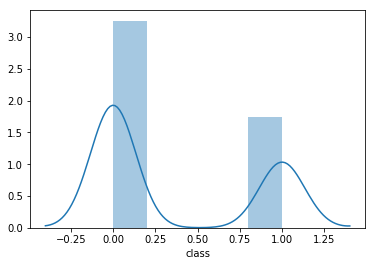

In [92]:
print(pima_df.groupby(["class"]).count())

sns.distplot(pima_df['class']) # numeric

#Just for your understanding - Using univariate analysis check the individual attributes for their basic statistic such as central values, spread, tails etc. What are your observations (any two attributes). Its an optional step and will not be graded.

In [78]:
df.skew(numeric_only  = True) , df.kurtosis(numeric_only  = True)

(preg     1.111795
 plas     0.535587
 pres     0.141885
 skin     1.223057
 test     2.693181
 mass     0.601059
 pedi     1.919911
 age      1.129597
 class    0.635017
 dtype: float64, preg     0.744680
 plas    -0.257847
 pres     1.098239
 skin     4.716995
 test     9.741075
 mass     0.921296
 pedi     5.594954
 age      0.643159
 class   -1.600930
 dtype: float64)

Using bivariate analysis check for useful relationships between attributes and attributes and the target class



# Q7. Use pairplots and correlation method to observe the relationship between different variables and state your insights.
Hint: Use seaborn plot and check the relationship between different variables 


Using the plot - infer the relationship between different variables

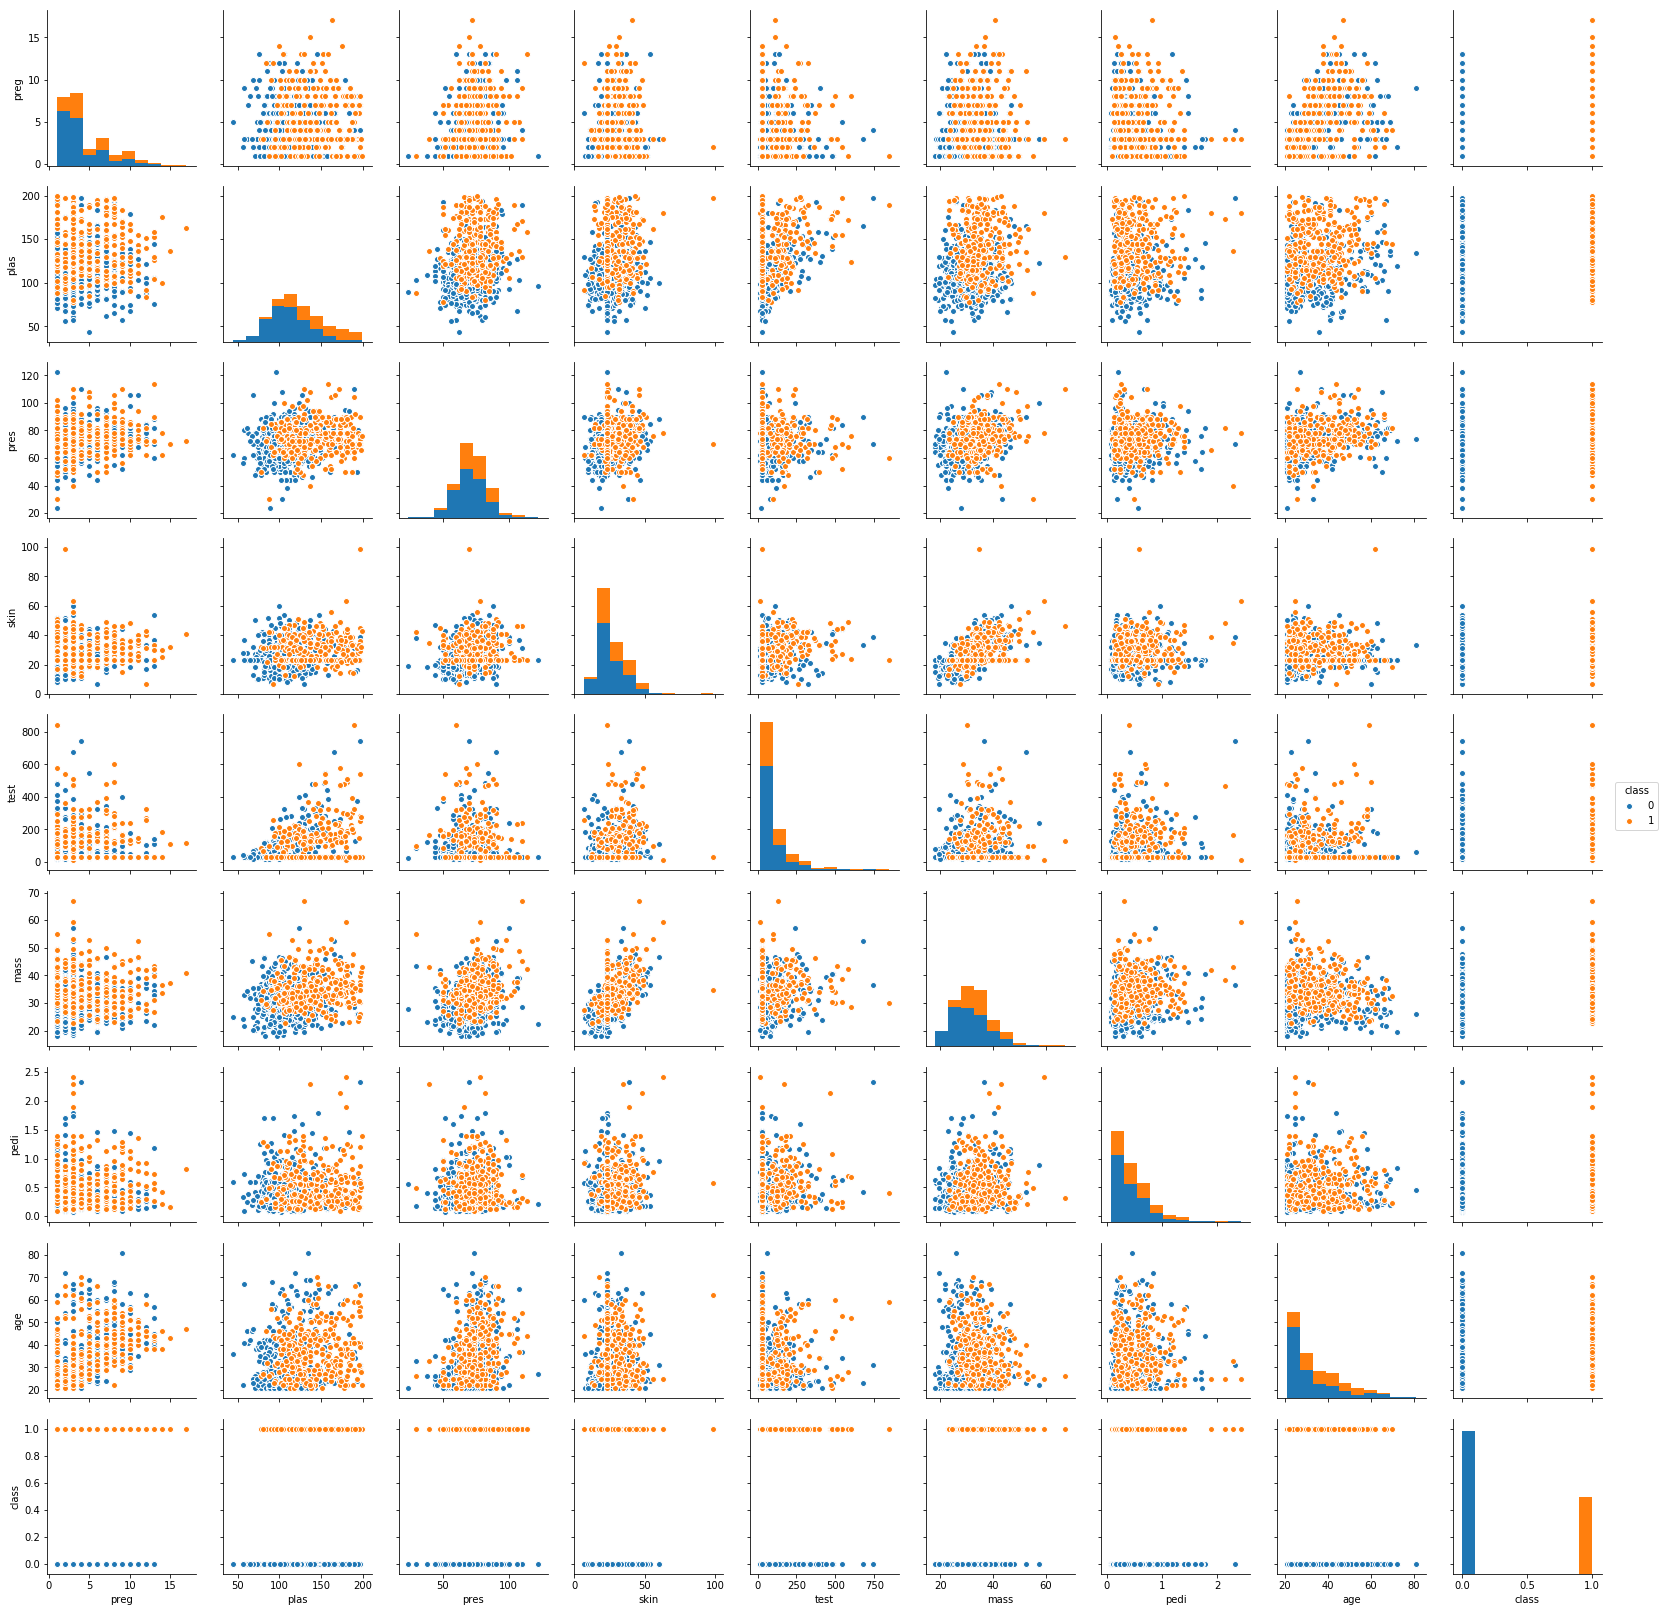

In [79]:
sns.pairplot(pima_df, hue = "class")

# Q8 Split the pima_df into training and test set in the ratio of 70:30 (Training:Test).</b>


In [82]:
array = pima_df.values
X = array[:,0:7] 
Y = array[:,8]  
test_size = 0.30 
seed = 10 
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)

# Q9 Create the decision tree model using “entropy” method of reducing the entropy and fit it to training data.</b>



In [83]:
dt_model = DecisionTreeClassifier(criterion = 'entropy' )
dt_model.fit(X_train, y_train)
dt_model.score(X_test , y_test) , dt_model.score(X_train , y_train)

(0.70995670995671, 1.0)

# Q10 Print the accuracy of the model & print the confusion matrix 

In [93]:
y_predict = dt_model.predict(X_test)

print(metrics.confusion_matrix(y_test, y_predict))

[[112  32]
 [ 35  52]]


Print the feature importance of the decision model - Optional

In [102]:
for name , importance in zip(pima_df.columns, dt_model.feature_importances_):
    print (name,importance)

preg 0.03623771572374401
plas 0.32761299920820985
pres 0.07674253427479868
skin 0.09041906022762122
test 0.05735038846444839
mass 0.25376230446045683
pedi 0.15787499764072105


# Q12 Apply the Random forest model and print the accuracy of Random forest Model

In [104]:
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 100)
rfcl = rfcl.fit(X_train, y_train)


In [105]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test , y_test))X = array[:,0:7] 
Y = array[:,8]  
print(metrics.confusion_matrix(y_test, y_predict))

0.7359307359307359
[[128  16]
 [ 45  42]]


# Q13 Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [107]:
from sklearn.ensemble import AdaBoostClassifier
#abcl = AdaBoostClassifier(base_estimator=dt_model, n_estimators=10)
abcl = AdaBoostClassifier( n_estimators=50)
abcl = abcl.fit(X_train, y_train)

In [108]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

print(metrics.confusion_matrix(y_test, y_predict))

0.7445887445887446
[[127  17]
 [ 42  45]]


# Q14 - Apply Bagging Classifier Algorithm and print the accuracy.

In [112]:
from sklearn.ensemble import BaggingClassifier
bgcl = BaggingClassifier(base_estimator=dt_model, n_estimators=50)
bgcl = bgcl.fit(X_train, y_train)

In [113]:
y_predict = bgcl.predict(X_test)
print(bgcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.7359307359307359
[[123  21]
 [ 40  47]]


# Q15 - Apply GradientBoost Classifier Algorithm for the same data and print the accuracy

In [114]:
from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 50)

gbcl = gbcl.fit(X_train, y_train)

In [115]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test , y_test))
print(metrics.confusion_matrix(y_test, y_predict))

0.7489177489177489
[[131  13]
 [ 45  42]]


# Next steps are optional and will not be graded.

Voting is one of the simplest ways of combining the predictions from multiple machine learning algorithms.

It works by first creating two or more standalone models from your training dataset. A Voting Classifier can then be used to wrap your models and average the predictions of the sub-models when asked to make predictions for new data.

Apply Voting Classfier on the given dataset and state your insights.

In [126]:
from sklearn import model_selection
from sklearn.ensemble import VotingClassifier

kfold = model_selection.KFold(n_splits=10, random_state=seed)

estimators = []

model1 = GradientBoostingClassifier()
estimators.append(('GBCL', model1))

model2 = DecisionTreeClassifier()
estimators.append(('cart', model2))

model3 = BaggingClassifier()
estimators.append(('bgcl', model3))

model4 = AdaBoostClassifier()
estimators.append(('abcl', model4))

model5 = RandomForestClassifier()
estimators.append(('RF', model5))

# create the ensemble model
ensemble = VotingClassifier(estimators)
results = model_selection.cross_val_score(ensemble, X_test,y_test, cv=kfold)
print(results.mean())




/home/raj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/raj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/raj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/raj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Re

0.7317028985507246


/home/raj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
/home/raj/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
